In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load Dataset
file_path = r"C:\Users\hp\OneDrive\Desktop\walmart.csv"
df = pd.read_csv(file_path)

In [4]:
#Initial Cleanup
df.columns = df.columns.str.lower()
df = df.drop_duplicates()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category',
       'purchase'],
      dtype='object')

In [5]:
#Fix 'stay_in_current_city_years'
df['stay_in_current_city_years'] = df['stay_in_current_city_years'].replace({'4+': 4}).astype(int)

In [6]:
#Convert 'gender' to numeric
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [7]:
#Handle Outliers in 'purchase' using Winsorization
df['purchase'] = winsorize(df['purchase'], limits=[0.01, 0.01])

In [8]:
#Feature Scaling (only numeric, not 'gender')
scale_cols = ['occupation', 'stay_in_current_city_years', 'product_category']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

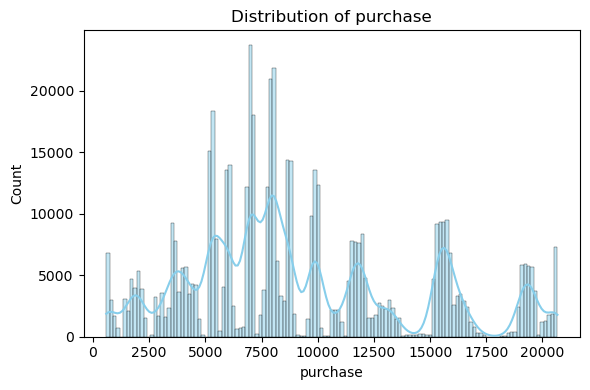

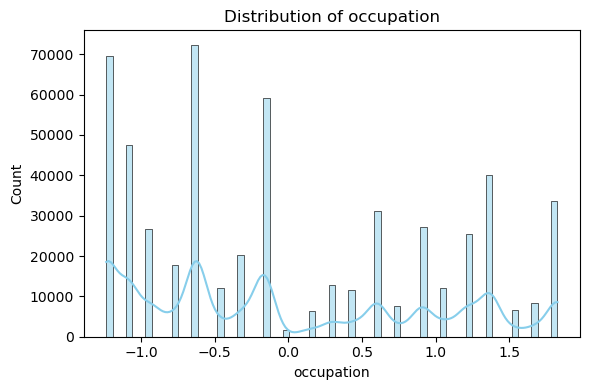

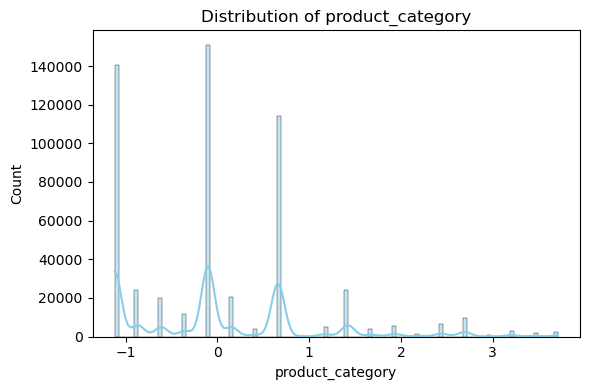

In [9]:
#EDA - Distribution of Numeric Columns
for col in ['purchase', 'occupation', 'product_category']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22968\3960937704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age', y='purchase', estimator=sum, palette='viridis')


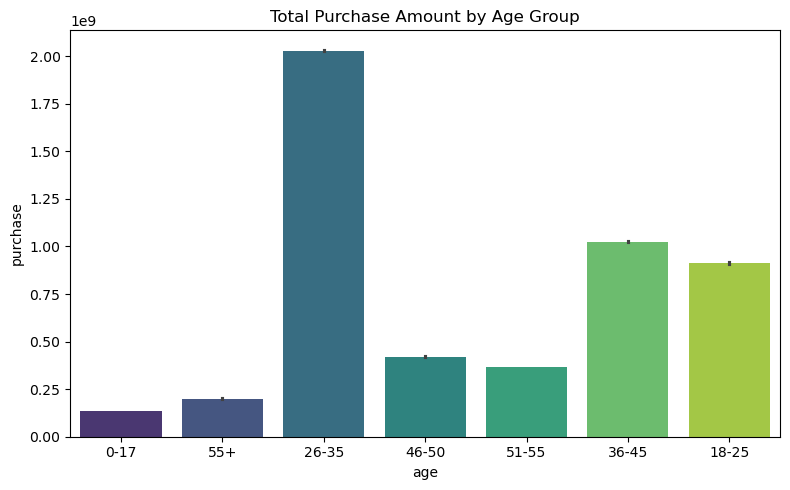

In [10]:
#Purchase Amount by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age', y='purchase', estimator=sum, palette='viridis')
plt.title('Total Purchase Amount by Age Group')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22968\3932290238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='user_id', y='purchase', palette='mako')


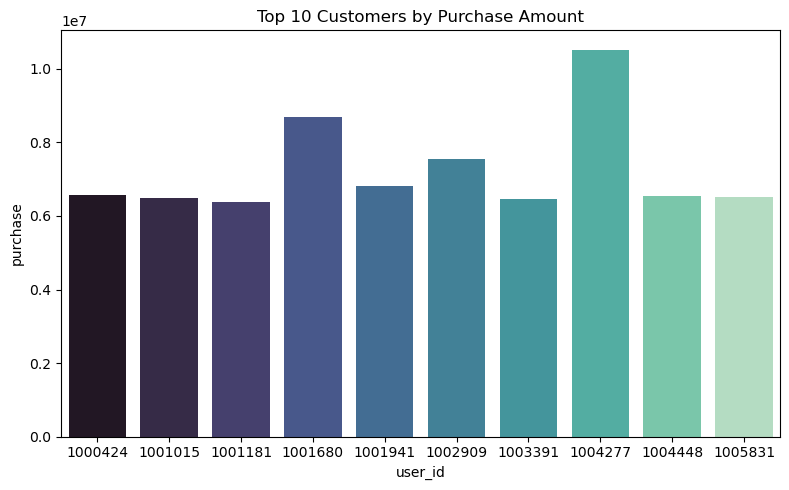

In [11]:

#Top 10 Customers
top_customers = df.groupby('user_id')['purchase'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=top_customers, x='user_id', y='purchase', palette='mako')
plt.title('Top 10 Customers by Purchase Amount')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_22968\1083772224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_id', y='purchase', palette='rocket')


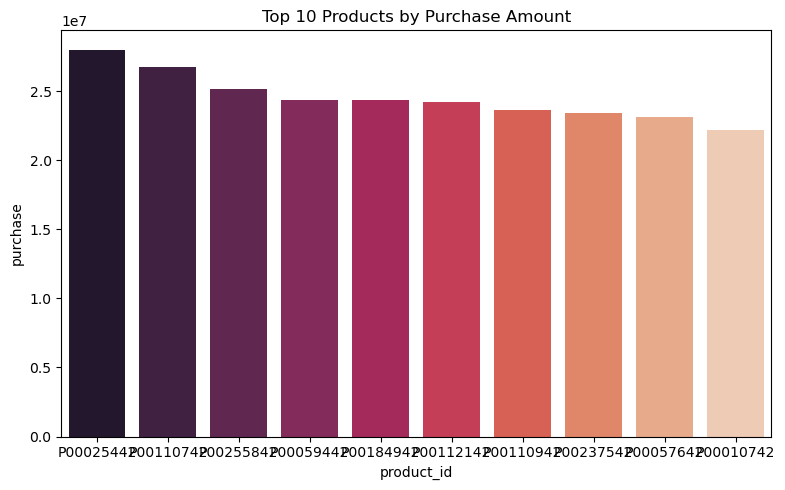

In [12]:

#Top 10 Products
top_products = df.groupby('product_id')['purchase'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='product_id', y='purchase', palette='rocket')
plt.title('Top 10 Products by Purchase Amount')
plt.tight_layout()
plt.show()


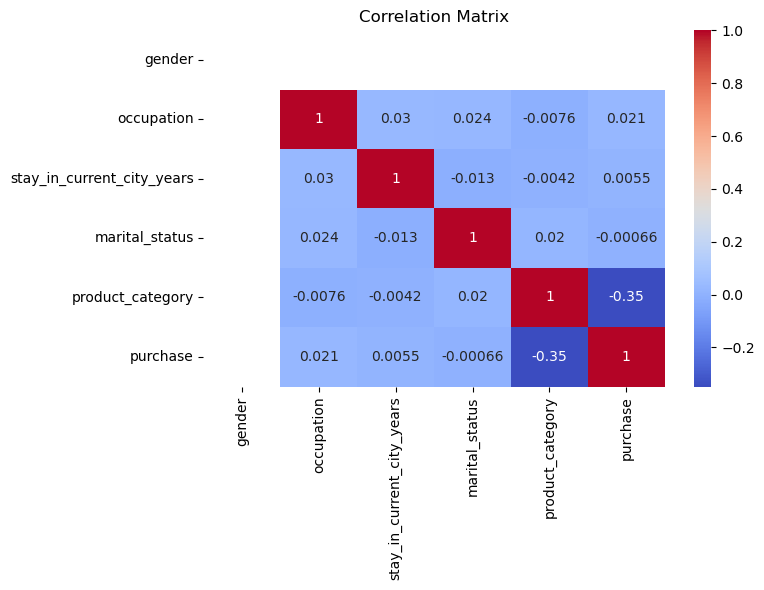

In [13]:

#Correlation Heatmap
corr_cols = ['gender', 'occupation', 'stay_in_current_city_years', 'marital_status', 'product_category', 'purchase']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [15]:

#Machine Learning - Predict Purchase
features = ['gender', 'occupation', 'stay_in_current_city_years', 'marital_status', 'product_category']
X = df[features]
y = df['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluation
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:

X = df[features].copy()
X = X.fillna(0)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]

y = df['purchase']

# Split + Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))


MAE: 3582.89
MSE: 21767427.07
R² Score: 0.12
